<a href="https://colab.research.google.com/github/madhu-1013/DS_internship/blob/main/Company_Bankrupcy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML Classification**

In [16]:
#1. logistic Regression

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer # Import SimpleImputer to handle missing values
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder

logr=LogisticRegression()

df=pd.read_csv("data.csv")

x = df.drop('Bankrupt?', axis=1)
x = x.drop(' Equity to Liability', axis=1)
y = df[' Equity to Liability']

X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=1,test_size=0.3)

# Separate numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(exclude=['number']).columns

# Impute missing values for numeric columns using the mean strategy
imputer_numeric = SimpleImputer(strategy='mean')
X_train_numeric = imputer_numeric.fit_transform(X_train[numeric_cols])
X_test_numeric = imputer_numeric.transform(X_test[numeric_cols])

# Handle categorical columns using OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')  # Handle unknown categories during testing
X_train_categorical = encoder.fit_transform(X_train[categorical_cols]).toarray()
print(X_train.head())

       ROA(C) before interest and depreciation before interest  \
3392                                           0.081412          
2755                                           0.528884          
4442                                           0.568274          
4267                                           0.474480          
4912                                           0.495881          

       ROA(A) before interest and % after tax  \
3392                                 0.091256   
2755                                 0.581334   
4442                                 0.634594   
4267                                 0.537233   
4912                                 0.554241   

       ROA(B) before interest and depreciation after tax  \
3392                                           0.091761    
2755                                           0.572033    
4442                                           0.624605    
4267                                           0.525296    
4912    

In [17]:
#KNN
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Load dataset
df = pd.read_csv("data.csv")

# Preparing X and Y
X = df.drop(['Bankrupt?'], axis=1)
Y = df['Bankrupt?']

# Ensure that the target variable is categorical
Y = Y.astype('category')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

# Separate numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(exclude=['number']).columns

# Impute missing values for numeric columns using mean strategy
imputer_numeric = SimpleImputer(strategy='mean')
X_train_numeric = imputer_numeric.fit_transform(X_train[numeric_cols])
X_test_numeric = imputer_numeric.transform(X_test[numeric_cols])
# Handle categorical columns using OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_categorical = encoder.fit_transform(X_train[categorical_cols]).toarray()
X_test_categorical = encoder.transform(X_test[categorical_cols]).toarray()

# Combine the imputed numerical and one-hot encoded categorical data
X_train_imputed = np.hstack((X_train_numeric, X_train_categorical))
X_test_imputed = np.hstack((X_test_numeric, X_test_categorical))

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
train = knn.fit(X_train_imputed, y_train)

# Predict on the test data
y_pred = knn.predict(X_test_imputed)

# Print the accuracy score
print('KNN:', accuracy_score(y_test, y_pred))

KNN: 0.9689149560117302


In [18]:
#decision tree
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Load dataset
df = pd.read_csv("data.csv")

# Preparing X and Y
X = df.drop(['Bankrupt?'], axis=1)
Y = df['Bankrupt?']

# Ensure that the target variable is categorical
Y = Y.astype('category')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=0.3)

# Separate numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(exclude=['number']).columns

# Impute missing values for numeric columns
imputer_numeric = SimpleImputer(strategy='mean')
X_train_numeric = imputer_numeric.fit_transform(X_train[numeric_cols])
X_test_numeric = imputer_numeric.transform(X_test[numeric_cols])
# Handle categorical columns using OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_categorical = encoder.fit_transform(X_train[categorical_cols]).toarray()
X_test_categorical = encoder.transform(X_test[categorical_cols]).toarray()

# Combine the imputed numerical and one-hot encoded categorical data
X_train_imputed = np.hstack((X_train_numeric, X_train_categorical))
X_test_imputed = np.hstack((X_test_numeric, X_test_categorical))

# Initialize the Decision Tree Classifier
dt = tree.DecisionTreeClassifier()

# Train the Decision Tree on the imputed and encoded data
dt.fit(X_train_imputed, y_train)

# Predict on the test data
y_pred = dt.predict(X_test_imputed)

# Print the accuracy score
print('Decision Tree:', accuracy_score(y_test, y_pred))

Decision Tree: 0.9530791788856305


In [19]:
#random forest
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Load dataset
df = pd.read_csv("data.csv")

# Preparing X and Y
X = df.drop(['Bankrupt?'], axis=1)
Y = df['Bankrupt?']

# Ensure that the target variable is categorical
Y = Y.astype('category')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=0.3)

# Separate numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(exclude=['number']).columns

# Impute missing values for numeric columns
imputer_numeric = SimpleImputer(strategy='mean')
X_train_numeric = imputer_numeric.fit_transform(X_train[numeric_cols])
X_test_numeric = imputer_numeric.transform(X_test[numeric_cols])
# Handle categorical columns using OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_categorical = encoder.fit_transform(X_train[categorical_cols]).toarray()
X_test_categorical = encoder.transform(X_test[categorical_cols]).toarray()

# Combine the imputed numerical and one-hot encoded categorical data
X_train_imputed = np.hstack((X_train_numeric, X_train_categorical))
X_test_imputed = np.hstack((X_test_numeric, X_test_categorical))

# Initialize the Random Forest Classifier
rf = RandomForestClassifier()

# Train the Random Forest on the imputed and encoded data
rf.fit(X_train_imputed, y_train)

# Predict on the test data
y_pred = rf.predict(X_test_imputed)

# Print the accuracy score
print('Random Forest:', accuracy_score(y_test, y_pred))

Random Forest: 0.9706744868035191


In [20]:
#gradient boosting
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Load dataset
df = pd.read_csv("data.csv")

# Preparing X and Y
X = df.drop(['Bankrupt?'], axis=1)
Y = df['Bankrupt?']

# Ensure that the target variable is categorical
Y = Y.astype('category')

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.2)

# Separate numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(exclude=['number']).columns

# Impute missing values for numeric columns
imputer_numeric = SimpleImputer(strategy='mean')
X_train_numeric = imputer_numeric.fit_transform(X_train[numeric_cols])
X_test_numeric = imputer_numeric.transform(X_test[numeric_cols])
# Handle categorical columns using OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_categorical = encoder.fit_transform(X_train[categorical_cols]).toarray()
X_test_categorical = encoder.transform(X_test[categorical_cols]).toarray()

# Combine the imputed numerical and one-hot encoded categorical data
X_train_imputed = np.hstack((X_train_numeric, X_train_categorical))
X_test_imputed = np.hstack((X_test_numeric, X_test_categorical))

# Initialize the Gradient Boosting Classifier
gbm = GradientBoostingClassifier(n_estimators=10)

# Train the Gradient Boosting model on the imputed and encoded data
gbm.fit(X_train_imputed, Y_train)

# Predict on the test data
y_pred = gbm.predict(X_test_imputed)

# Print the accuracy score
print("GBM: ", accuracy_score(Y_test, y_pred))

GBM:  0.968475073313783


# **Data Engineering**

In [1]:
#Import the datset
import pandas as pd
df=pd.read_csv("data.csv")
print(df.head(5))

   Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.4577

In [2]:
#Dealing with ouliers
import pandas as pd

df=pd.read_csv("data.csv")

X = df.drop('Bankrupt?', axis=1)
X = X.drop(' Equity to Liability', axis=1)
Y = df[' Equity to Liability']
print(X)
print(Y)

       ROA(C) before interest and depreciation before interest  \
0                                              0.370594          
1                                              0.464291          
2                                              0.426071          
3                                              0.399844          
4                                              0.465022          
...                                                 ...          
6814                                           0.493687          
6815                                           0.475162          
6816                                           0.472725          
6817                                           0.506264          
6818                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3          

In [3]:
#Feature Selection 1
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Load dataset
df = pd.read_csv("data.csv")

# Preparing X and Y
X = df.drop(['Bankrupt?'], axis=1)
Y = df['Bankrupt?']

# Ensure that the target variable is binary (0 or 1)
if not pd.api.types.is_integer_dtype(Y):
    Y = Y.astype('category').cat.codes

# Separate numeric and categorical columns
numeric_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(exclude=['number']).columns

# Impute missing values for numeric columns
imputer_numeric = SimpleImputer(strategy='mean')
X_numeric = imputer_numeric.fit_transform(X[numeric_cols])

# Handle categorical columns using OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
X_categorical = encoder.fit_transform(X[categorical_cols]).toarray()

# Combine the imputed numerical and one-hot encoded categorical data
X_imputed = np.hstack((X_numeric, X_categorical))

# Perform feature selection
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X_imputed, Y) # Use the binary version of Y

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)  # Use original column names for clarity
featuresScores = pd.concat([dfcolumns, dfscores], axis=1)
featuresScores.columns = ['Specs', 'Score']

print(featuresScores)

                                                Specs     Score
0    ROA(C) before interest and depreciation befor...  3.380804
1              ROA(A) before interest and % after tax  4.207267
2    ROA(B) before interest and depreciation after...  3.483747
3                              Operating Gross Margin  0.032187
4                         Realized Sales Gross Margin  0.031737
..                                                ...       ...
90                                Liability to Equity  0.141553
91                 Degree of Financial Leverage (DFL)  0.006711
92   Interest Coverage Ratio (Interest expense to ...  0.000064
93                                    Net Income Flag  0.000000
94                                Equity to Liability  2.472230

[95 rows x 2 columns]


[0.0130672  0.01224596 0.01342214 0.0092431  0.00725463 0.00947899
 0.01067881 0.01611113 0.01309155 0.01431177 0.00867612 0.00785938
 0.00831494 0.01451044 0.00258213 0.01506754 0.01541192 0.01301234
 0.02084834 0.00701253 0.00828562 0.00854138 0.01503062 0.00780258
 0.00824237 0.00891072 0.00873243 0.00846517 0.00788425 0.01561354
 0.00979473 0.00728327 0.00926165 0.01392405 0.01181161 0.0184958
 0.01615425 0.01681072 0.00867248 0.01807049 0.00970725 0.00864755
 0.01321204 0.00840421 0.00848861 0.0085637  0.00964584 0.00997276
 0.00894661 0.00853809 0.01030459 0.01116095 0.00961349 0.01188028
 0.00833879 0.00784032 0.01183467 0.01077    0.01139127 0.00981601
 0.00750954 0.01029524 0.00976738 0.00786733 0.00936672 0.01295817
 0.00821045 0.01024886 0.01466486 0.008717   0.00904414 0.0076745
 0.01052252 0.00860601 0.00962966 0.00832601 0.00891648 0.01130475
 0.01076707 0.00869403 0.00850839 0.00685008 0.00833125 0.00861357
 0.00249829 0.0142415  0.00972846 0.01026133 0.00928007 0.015636

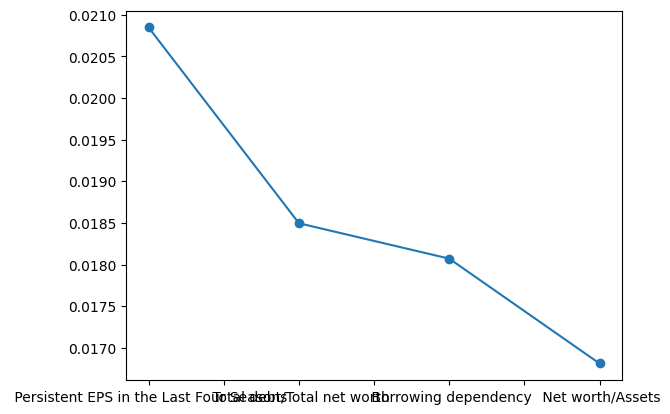

In [4]:
#Feature Selection 2

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelBinarizer

model = ExtraTreesClassifier()

le = LabelEncoder()
X_encoded = X.apply(le.fit_transform) # Apply LabelEncoder to all columns in X

imputer = SimpleImputer(strategy='mean') # Or another strategy like 'median', 'most_frequent'
Y_imputed = imputer.fit_transform(Y.values.reshape(-1, 1)) # Reshape Y to a 2D array as required by SimpleImputer
Y_imputed = Y_imputed.flatten() # Flatten back to 1D array

# Convert Y_imputed to categorical if it's continuous
if Y_imputed.dtype != object:
    threshold = Y_imputed.mean()
    Y_imputed_categorical = (Y_imputed > threshold).astype(int)
else:
    Y_imputed_categorical = Y_imputed

model.fit(X_encoded,Y_imputed_categorical) # Fit the model with encoded features and categorical target
print(model.feature_importances_)

feat_importance = pd.Series(model.feature_importances_, index=X_encoded.columns) # Use encoded column names
feat_importance.nlargest(4).plot(kind='line', marker='o')
#plot(kind='box')
# plot(kind='area')
# plot(kind='pie', autopct='%1.1f%%')
# plot(kind='line', marker='o')
plt.show()

In [5]:
#Numerical to Categorical
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder


df[' Quick Assets/Current Liability']=pd.cut(df[' Quick Assets/Current Liability'],3,labels=['0','1','2'])
df[' Cash/Current Liability']=pd.cut(df[' Cash/Current Liability'],3,labels=['0','1','2'])
df[' Current Liability to Assets']=pd.cut(df[' Current Liability to Assets'],3,labels=['0','1','2'])
df[' Operating Funds to Liability']=pd.cut(df[' Operating Funds to Liability'],3,labels=['0','1','2'])

print(df)

X = df.drop('Bankrupt?', axis=1)
X = X.drop(' Equity to Liability', axis=1)
Y = df[' Equity to Liability']
print(Y)
le=LabelEncoder()
le.fit(Y)
Y = le.transform(Y)
print(Y)

      Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                         

In [6]:
#Categorical to Numerical
le=LabelEncoder()
le.fit(Y)
Y = le.transform(Y)
print(Y)

[ 286  967  288 ... 6299 4542 6749]


In [7]:
print(df.isnull().sum())

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64


In [8]:
#Dealing with missing values
df[' Inventory/Working Capital'].fillna(df[' Inventory/Working Capital'].mode()[0], inplace=True)

df[' Equity to Liability'].fillna(df[' Equity to Liability'].mode()[0], inplace=True)
print(df.head())

   Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.4577

In [9]:
import pandas as pd

# Print the count of missing values for each column
print("Missing values count before imputation:")
print(df.isnull().sum())

# Check if 'Item_Weight' is in the DataFrame columns
if 'Item_Weight' in df.columns:
    df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
else:
    print("Column 'Item_Weight' not found in the DataFrame.")

# Similarly, check if 'Outlet_Size' exists before imputing
if 'Outlet_Size' in df.columns:
    # Imputing categorical values with a specific value, e.g., 'Medium'
    df['Outlet_Size'].fillna('Medium', inplace=True)
else:
    print("Column 'Outlet_Size' not found in the DataFrame.")

# Print the count of missing values after imputation
print("Missing values count after imputation:")
print(df.isnull().sum())

Missing values count before imputation:
Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64
Column 'Item_Weight' not found in the DataFrame.
Column 'Outlet_Size' not found in the DataFrame.
Missing values count after imputation:
Bankrupt?                                                   0
 ROA(C) before interest and depreciation before intere

In [10]:
#Oversampling and Under Sampling

print(df.isnull().sum())
df[' Quick Asset Turnover Rate'].fillna(df[' Quick Asset Turnover Rate'].mode()[0], inplace=True)
from collections import Counter
print(Counter(Y))
from imblearn.over_sampling import RandomOverSampler     #Random OverSampling
ros=RandomOverSampler(random_state=0)
X, Y = ros.fit_resample(X,Y)
print(Counter(Y))

from imblearn.over_sampling import SMOTE                 #Synthetic Minority Oversampling (SMOTE) oversampling
sms=SMOTE(random_state=0)

X = X.fillna(X.mode().iloc[0]) # Fill NaNs with the mode of each column
X, Y=sms.fit_resample(X,Y) # Now X should not contain NaNs

from imblearn.under_sampling import RandomUnderSampler   #Random UnderSampling
rus=RandomUnderSampler(random_state=0)
X, Y=rus.fit_resample(X,Y)

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64
Counter({286: 1, 967: 1, 288: 1, 1610: 1, 3642: 1, 760: 1, 182: 1, 3554: 1, 5646: 1, 2929: 1, 3782: 1, 4209: 1, 1871: 1, 3639: 1, 4418: 1, 4027: 1, 5548: 1, 4871: 1, 2020: 1, 4926: 1, 4135: 1, 3940: 1, 1803: 1, 484: 1, 455: 1, 1791: 1, 4322: 1, 6372: 1, 4422: 1, 162: 1, 109: 1, 277: 1, 3143: 

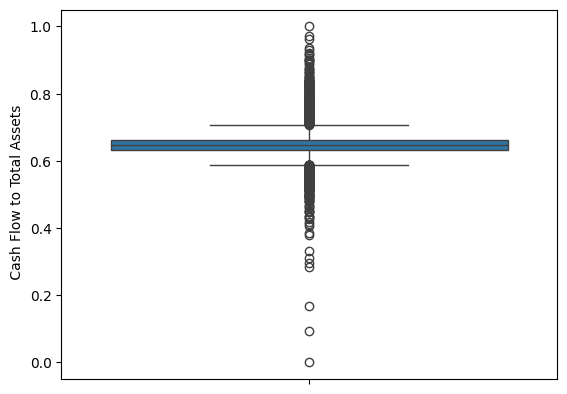

In [11]:
#Identifying Outliers by ploting

from matplotlib import pyplot as plt
import seaborn as sns
sns.boxplot(df[' Cash Flow to Total Assets'])
plt.show()

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

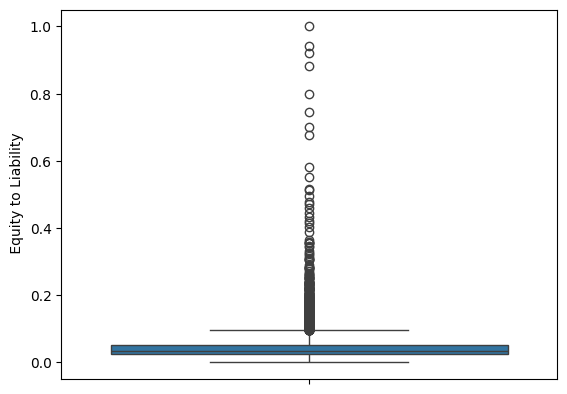

In [12]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Check the available columns in your DataFrame
print(df.columns)

# Assuming 'Liability to Equity' is actually ' Equity to Liability'
sns.boxplot(df[' Equity to Liability'])
plt.show()

In [13]:
#Dealing with Outliers using Interquantile Range

# Convert ' Cash Flow to Equity' to numeric, coercing errors to NaN
df[' Cash Flow to Equity'] = pd.to_numeric(df[' Cash Flow to Equity'], errors='coerce')

# Drop rows with NaN in ' Cash Flow to Equity' if needed
df.dropna(subset=[' Cash Flow to Equity'], inplace=True)

print(df[' Cash Flow to Equity'])
Q1 = df[' Cash Flow to Equity'].quantile(0.25)
Q3 = df[' Cash Flow to Equity'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

print(upper)
print(lower)

out1=df[df[' Cash Flow to Equity'] < lower].values
out2=df[df[' Cash Flow to Equity'] > upper].values

df[' Cash Flow to Equity'].replace(out1,lower,inplace=True)
df[' Cash Flow to Equity'].replace(out2,upper,inplace=True)

print(df[' Cash Flow to Equity'])

0       0.312905
1       0.314163
2       0.314515
3       0.302382
4       0.311567
          ...   
6814    0.314063
6815    0.314446
6816    0.313353
6817    0.320118
6818    0.316238
Name:  Cash Flow to Equity, Length: 6819, dtype: float64
0.004712489142293996
0.32477592245600795
0.30592596588683196
0       0.312905
1       0.314163
2       0.314515
3       0.302382
4       0.311567
          ...   
6814    0.314063
6815    0.314446
6816    0.313353
6817    0.320118
6818    0.316238
Name:  Cash Flow to Equity, Length: 6819, dtype: float64


In [14]:
import pandas as pd


# Ensure ' Net Income to Total Assets' is numeric
df[' Net Income to Total Assets'] = pd.to_numeric(df[' Net Income to Total Assets'], errors='coerce')

# Specify the column name you want to print
print(df[' Net Income to Total Assets']) # Replace ' Net Income to Total Assets' with the actual column name

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[' Net Income to Total Assets'].quantile(0.25)
Q3 = df[' Net Income to Total Assets'].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1
print("IQR:", IQR)

# Determine upper and lower bounds for outliers
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

print("Upper bound:", upper)
print("Lower bound:", lower)

# Identify outliers
out1 = df[' Net Income to Total Assets'] < lower
out2 = df[' Net Income to Total Assets'] > upper

# Replace outliers with respective bounds
df.loc[out1, ' Net Income to Total Assets'] = lower
df.loc[out2, ' Net Income to Total Assets'] = upper

print(df[' Net Income to Total Assets'])

0       0.716845
1       0.795297
2       0.774670
3       0.739555
4       0.795016
          ...   
6814    0.799927
6815    0.799748
6816    0.797778
6817    0.811808
6818    0.815956
Name:  Net Income to Total Assets, Length: 6819, dtype: float64
IQR: 0.029704680347701018
Upper bound: 0.871011550062423
Lower bound: 0.752192828671619
0       0.752193
1       0.795297
2       0.774670
3       0.752193
4       0.795016
          ...   
6814    0.799927
6815    0.799748
6816    0.797778
6817    0.811808
6818    0.815956
Name:  Net Income to Total Assets, Length: 6819, dtype: float64


In [15]:
#PCA

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer # Import SimpleImputer
from sklearn.preprocessing import Binarizer # Import Binarizer for converting to binary

logr=LogisticRegression()
pca=PCA(n_components=2)

X = df.drop('Bankrupt?', axis=1)
X = X.drop(' Equity to Liability', axis=1)
Y = df[' Equity to Liability']

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean') # Replace 'mean' with your desired strategy
X = imputer.fit_transform(X) # Fit and transform to impute NaNs

pca.fit(X)
X=pca.transform(X)

print(X)

# --- Convert continuous target to binary ---
# Set a threshold and convert ' Equity to Liability' to binary
threshold = Y.mean()
binarizer = Binarizer(threshold=threshold)
Y = binarizer.fit_transform(Y.values.reshape(-1, 1)).ravel()

X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0,test_size=0.3)

logr.fit(X_train,y_train)

y_pred=logr.predict(X_test)
print('Accuracy:',accuracy_score(y_test,y_pred))

[[ 2.16534452e+09 -3.80580749e+07]
 [ 4.90423750e+08  8.46416283e+09]
 [-2.63502825e+09 -2.14872626e+09]
 ...
 [-2.62968672e+09 -2.70473156e+09]
 [-3.93137732e+09  1.16251432e+09]
 [-2.50665740e+09 -2.09819770e+09]]
Accuracy: 0.5503421309872922


# **Visualization**

In [21]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("data.csv")

# Preparing X and Y
X = df.drop('Bankrupt?', axis=1)
X = X.drop(' Equity to Liability', axis=1)
Y = df[' Equity to Liability']
print(X)
print(Y)

       ROA(C) before interest and depreciation before interest  \
0                                              0.370594          
1                                              0.464291          
2                                              0.426071          
3                                              0.399844          
4                                              0.465022          
...                                                 ...          
6814                                           0.493687          
6815                                           0.475162          
6816                                           0.472725          
6817                                           0.506264          
6818                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3          

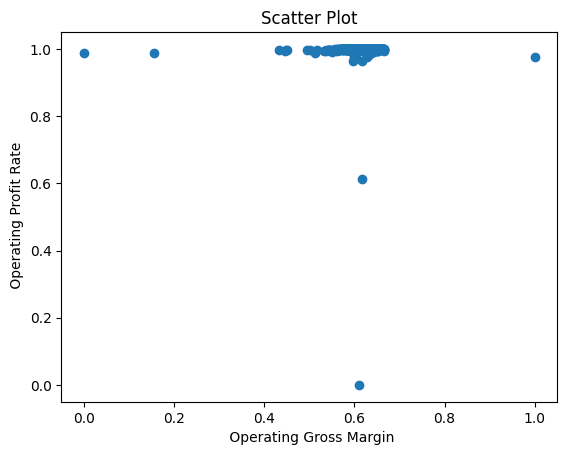

In [22]:
# Scatter Plot to find correlations between two continuous variables
plt.scatter(df[" Operating Gross Margin"], df[" Operating Profit Rate"])
plt.title("Scatter Plot")
plt.xlabel(" Operating Gross Margin")
plt.ylabel(" Operating Profit Rate")
plt.show()

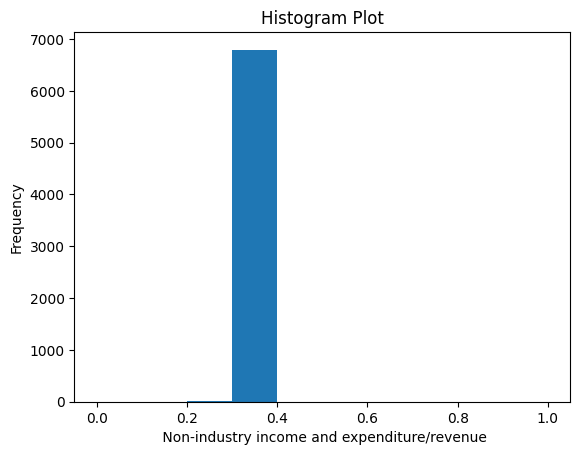

In [23]:
# Histogram shows the distribution of a continuous variable
plt.hist(df[" Non-industry income and expenditure/revenue"])
plt.title("Histogram Plot")
plt.xlabel(" Non-industry income and expenditure/revenue")
plt.ylabel("Frequency")
plt.show()

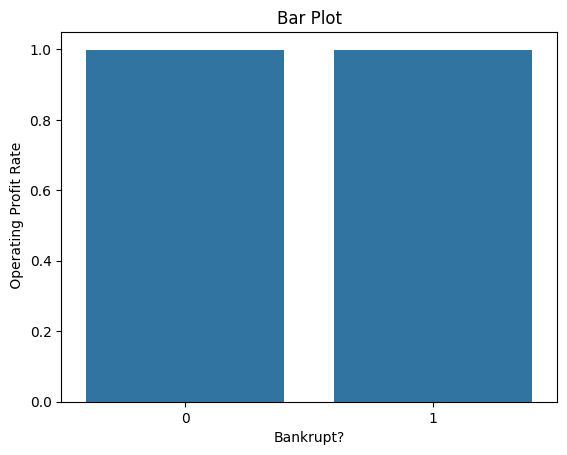

In [24]:
# Bar Chart or Bar Plot is used to represent categorical data with vertical or horizontal bars.
sns.barplot(x="Bankrupt?", y=" Operating Profit Rate", data=df)
plt.title("Bar Plot")
plt.show()

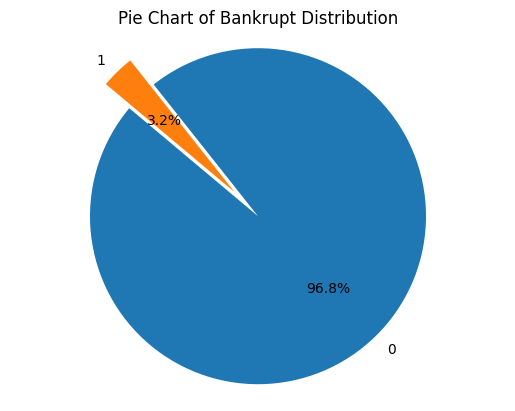

In [25]:
#Pie Chart to show the distribution of Bankrupt?
bankrupt_counts = df['Bankrupt?'].value_counts()
bankrupt_labels = bankrupt_counts.index
sizes = bankrupt_counts.values

plt.pie(sizes, labels=bankrupt_labels, autopct='%1.1f%%', startangle=140, explode=[0.1] * len(sizes))
plt.title("Pie Chart of Bankrupt Distribution")
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

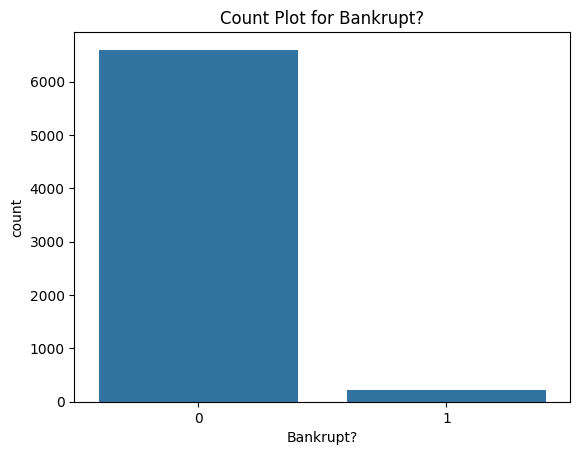

In [26]:
# Count Plot to show the count of occurrences for each category of Bankrupt?
sns.countplot(x='Bankrupt?', data=df)
plt.title("Count Plot for Bankrupt?")
plt.show()

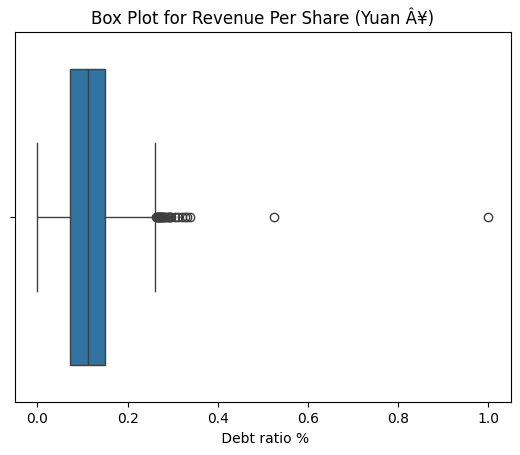

In [27]:
# Box Plot showing the distribution of Revenue Per Share (Yuan Â¥).
sns.boxplot(x=' Debt ratio %', data=df)  # if x horizontal and if y vertical
plt.title("Box Plot for Revenue Per Share (Yuan Â¥)")
plt.show()

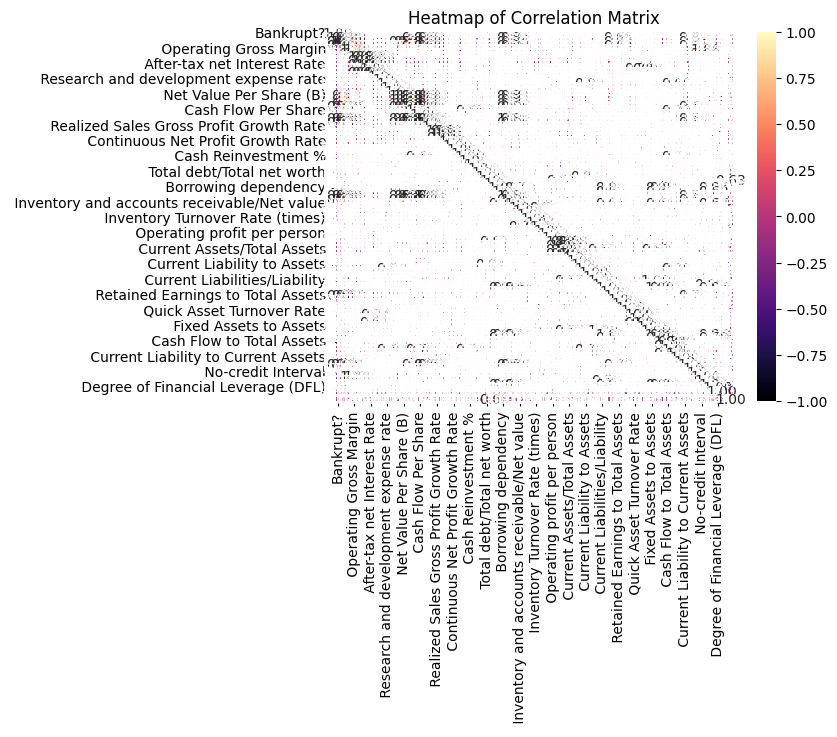

In [28]:
# Calculate correlation matrix only for numerical columns
correlation_matrix = df.corr()  # Calculate correlations
# Heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt='.2f')
plt.title("Heatmap of Correlation Matrix")
plt.show()